In [193]:
import numpy as np
from astropy.table import Table
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_color_codes()

### Read in bow shock data from Kobulnicky:2017a

In [278]:
tab01 = Table.read("data/Kobulnicky2017/J_AJ_154_201_table1.dat.fits")

Remove coordinate columns that we do not want. Also the color temperatures. *And we have to remove the Name field*. This is because of inconsitencies between the names in the different tables, which cause problems when we merge.

In [4]:
tab01.remove_columns(
   [
       'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs',
       'T70/160', 'Name',
   ]
)

In [5]:
tab01[300:310]

ID,Rad,Height,l_F3.6,F3.6,l_F4.5,F4.5,l_F5.8,F5.8,l_F8.0,F8.0,F24,l_F70,F70,l_F160,F160,I70,T24/70
,arcsec,arcsec,,Jy,,Jy,,Jy,,Jy,Jy,,Jy,,Jy,Jy / arcmin2,K
int32,int32,int32,str1,float64,str1,float64,str1,float64,str1,float64,float64,str1,float64,str1,float64,float64,int32
311,6,5,<,0.005,<,0.05,<,0.017,<,0.041,1.43,<,0.55,<,0.38,-99.9,-99
312,5,5,<,0.011,<,0.004,<,0.015,<,0.031,1.11,<,0.24,<,0.17,-99.9,-99
314,5,8,<,0.023,<,0.015,<,0.021,<,0.006,1.559,,0.45,<,0.05,3.5,271
331,33,30,<,0.036,<,0.024,<,0.032,<,0.017,28.45,,12.72,<,4.8,17.6,195
332,21,34,<,0.125,<,0.097,<,0.378,<,0.819,6.096,<,18.5,<,11.1,-99.9,-99
333,11,12,<,0.014,<,0.013,<,0.063,<,0.241,6.22,,8.99,<,2.5,17.6,116
334,12,13,<,0.004,<,0.004,<,0.005,<,0.005,0.463,,1.45,<,0.17,7.0,93
335,20,16,<,0.05,<,0.034,<,0.142,<,0.265,2.582,<,4.43,<,3.01,-99.9,-99


Indicate lower limit fluxes by negative values, as in the published table: 

In [6]:
for band in 'F3.6', 'F4.5', 'F5.8', 'F8.0', 'F70', 'F160':
    lband = 'l_' + band
    m = tab01[lband] == '<'
    tab01[band][m] = -tab01[band][m]
    tab01.remove_column(lband)

In [7]:
tab01

ID,Rad,Height,F3.6,F4.5,F5.8,F8.0,F24,F70,F160,I70,T24/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32
1,38,44,-0.074,-0.15,-0.086,0.255,8.73,28.3,-22.0,126.5,92
2,16,25,-0.258,-0.149,-0.114,0.041,0.453,0.45,-2.0,24.6,132
3,13,21,-0.139,-0.12,-0.23,0.71,13.305,39.0,-20.0,372.6,95
4,17,19,-0.065,-0.375,-0.062,0.108,1.023,3.91,-7.0,355.0,89
5,12,23,-0.055,-0.038,-0.02,-0.01,0.273,-0.4,-3.8,-99.9,-99
6,11,17,-0.086,-0.061,-0.059,-0.025,0.37,1.3,-6.4,56.2,90
7,13,13,0.103,0.106,0.496,1.311,0.83,21.7,10.6,179.3,61
8,10,12,-0.083,-0.25,-0.056,-0.093,0.609,4.7,2.4,59.8,76


In [285]:
tab02 = Table.read("data/Kobulnicky2017/J_AJ_154_201_table2.dat.fits")

In [286]:
m = (tab02['RAh'] == 10)# & (tab01['RAm'] == 5)
tab02[m]

ID,Name,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Rad,Height,l_F3.4,F3.4,l_F4.6,F4.6,l_F12,F12,F22,l_F70,F70,l_F160,F160,I70,T22/70,T70/160
,,h,min,s,,deg,arcmin,arcsec,arcsec,arcsec,,Jy,,Jy,,Jy,Jy,,Jy,,Jy,Jy / arcmin2,K,K
int32,str17,int32,int32,float64,str1,int32,int32,float64,int32,int32,str1,float64,str1,float64,str1,float64,float64,str1,float64,str1,float64,float64,int32,int32
396,G281.4302-01.2395,10,2,51.33,-,56,54,1.2,24,19,<,0.008,<,0.009,,0.069,0.767,,1.55,<,2.34,7.7,112,-99
397,G282.1647-00.0256,10,12,20.45,-,56,20,33.9,33,30,,0.069,,0.091,,2.202,12.888,,8.09,<,2.37,14.1,167,-99
398,G282.4664-02.4659,10,3,36.05,-,58,30,8.4,35,26,,0.081,,0.074,,1.377,1.151,,-99.999,,-99.999,-99.9,-99,-99
403,G285.4396+00.7971,10,35,49.86,-,57,23,42.7,26,22,<,0.005,<,0.007,,0.174,1.044,,-99.999,,-99.999,-99.9,-99,-99
404,G286.0588-01.6633,10,30,23.28,-,59,49,53.2,59,37,<,0.034,<,0.015,,0.398,5.101,,12.9,<,11.7,5.3,106,-99
405,G286.4644-00.3478,10,38,19.14,-,58,53,46.7,25,18,<,0.043,<,0.047,,0.538,6.424,,6.92,<,11.4,14.1,136,-99
406,G287.1148-01.0236,10,40,12.38,-,59,48,10.3,25,15,<,0.006,<,0.004,,1.828,8.969,,3.13,<,3.4,35.2,230,-99
413,G288.3138-01.3085,10,47,38.87,-,60,37,4.2,25,24,<,0.048,<,0.045,,0.319,4.524,,6.87,<,5.48,10.6,122,-99


In [9]:
tab02.remove_columns(
   [
       'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs',
       'T70/160', 'Name',
   ]
)
for band in 'F3.4', 'F4.6', 'F12', 'F70', 'F160':
    lband = 'l_' + band
    m = tab02[lband] == '<'
    tab02[band][m] = -tab02[band][m]
    tab02.remove_column(lband)

In [10]:
tab02[20:30]

ID,Rad,Height,F3.4,F4.6,F12,F22,F70,F160,I70,T22/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,int32
324,29,22,-0.015,-0.008,-0.033,0.213,-0.41,-0.54,-99.9,-99
325,15,14,-0.04,-0.045,0.042,0.195,-99.999,-99.999,-99.9,-99
326,22,16,-0.004,-0.005,-0.005,0.123,-99.999,-99.999,-99.9,-99
327,15,7,-0.004,-0.004,0.254,1.266,4.38,-2.12,38.7,98
328,16,12,-0.002,-0.003,-0.004,0.039,-99.999,-99.999,-99.9,-99
330,30,19,-0.159,-0.108,-0.153,0.636,-0.87,-0.57,-99.9,-99
343,300,190,-0.264,-0.187,10.798,148.857,-99.999,-99.999,-99.9,-99
344,171,108,-0.066,-0.115,18.036,141.124,482.2,134.8,52.7,98


There is something wrong with Table 5.  There is an integer column that contains `'---'` strings, which need dealing with or the reader will crash. This doesn't seem to be possible with the FITS table reader, so we resort to ascii, where we can fix it with the `fill_values` parameter.

In [11]:
tab05 = Table.read("data/Kobulnicky2017/table5.dat", 
                   fill_values=[('---', -1)], 
                   format='ascii.cds', 
                   readme="data/Kobulnicky2017/ReadMe")

In [12]:
tab05.remove_columns(
    [
        'TSS', 'T22/T70', 'T70/160', 
    ]
)

In [13]:
import astropy.units as u

In [14]:
import astropy.constants as const

In [15]:
tab05['LIR'] = tab05['FIR'].to(u.erg/u.cm**2/u.s)*4*np.pi*(tab05['Dist']*1e3*u.parsec).to(u.cm)**2 / const.L_sun.to(u.erg/u.s)

In [16]:
tab05

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028


In [17]:
from astropy.table import join

In [18]:
tab05_01 = join(tab05, tab01, keys=('ID'), join_type='left')
tab05_01.remove_columns(['F3.6', 'F4.5', 'F5.8',])
tab05_01

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad,Height,F8.0,F24,F70,F160,I70,T24/70
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,int32
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,--,--,--,--,--,--,--,--
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9,9,0.31,27.659,4.41,-5.4,38.7,708
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33,30,-0.017,28.45,12.72,-4.8,17.6,195
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24,16,1.179,32.85,55.63,-18.07,98.4,110
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108,66,-0.34,31.116,40.7,-5.5,31.6,120
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30,25,-0.278,10.669,11.98,-5.91,-99.9,126
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18,10,0.383,0.773,8.99,5.25,49.2,70


In [19]:
tab05_01_02 = join(tab05_01, tab02, keys=('ID'), join_type='left')
tab05_01_02.remove_columns(['F3.4', 'F4.6',])
tab05_01_02

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad_1,Height_1,F8.0,F24,F70_1,F160_1,I70_1,T24/70,Rad_2,Height_2,F12,F22,F70_2,F160_2,I70_2,T22/70
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,int32
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,--,--,--,--,--,--,--,--,173,404,51.32,343.77,246.7,61.55,9.8,158
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9,9,0.31,27.659,4.41,-5.4,38.7,708,--,--,--,--,--,--,--,--
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33,30,-0.017,28.45,12.72,-4.8,17.6,195,--,--,--,--,--,--,--,--
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24,16,1.179,32.85,55.63,-18.07,98.4,110,--,--,--,--,--,--,--,--
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108,66,-0.34,31.116,40.7,-5.5,31.6,120,--,--,--,--,--,--,--,--
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30,25,-0.278,10.669,11.98,-5.91,-99.9,126,--,--,--,--,--,--,--,--
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18,10,0.383,0.773,8.99,5.25,49.2,70,--,--,--,--,--,--,--,--


Now merge the WISE and Spitzer photometry, taking (8, 12) and (22, 24) as equivalent.

In [20]:
# Make a mask that is true for rows with Spitzer photometry
m_sst = ~tab05_01_02['Rad_1'].mask
m_wise = ~tab05_01_02['Rad_2'].mask
m_sst, m_wise

(array([False,  True, False,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False,  True,  True,  True,
         True, False], dtype=bool),
 array([ True, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False,  True], dtype=bool))

In [21]:
groups = [
    ['Rad_1', 'Rad_2', 'Rad'],
    ['Height_1', 'Height_2', 'Height'],
    ['F8.0', 'F12', 'F8 or 12'],
    ['F24', 'F22', 'F24 or 22'],
    ['F70_1', 'F70_2', 'F70'],
    ['F160_1', 'F160_2', 'F160'],
    ['I70_1', 'I70_2', 'I70'],
    ['T24/70', 'T22/70', 'T2x/70'],
]

for sst, wise, merge in groups:
    tab05_01_02[merge] = np.where(m_sst, tab05_01_02[sst], np.where(m_wise, tab05_01_02[wise], np.nan))
    tab05_01_02[merge].mask = ~(m_sst | m_wise)
    tab05_01_02.remove_columns([sst, wise])
tab05_01_02['Observatory'] = np.where(m_sst, 'SST', np.where(m_wise, 'WISE', None))
tab05_01_02

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad,Height,F8 or 12,F24 or 22,F70,F160,I70,T2x/70,Observatory
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,,,,,,,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,173.0,404.0,51.32,343.77,246.7,61.55,9.8,158.0,WISE
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9.0,9.0,0.31,27.659,4.41,-5.4,38.7,708.0,SST
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,None
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33.0,30.0,-0.017,28.45,12.72,-4.8,17.6,195.0,SST
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24.0,16.0,1.179,32.85,55.63,-18.07,98.4,110.0,SST
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108.0,66.0,-0.34,31.116,40.7,-5.5,31.6,120.0,SST
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30.0,25.0,-0.278,10.669,11.98,-5.91,-99.9,126.0,SST
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18.0,10.0,0.383,0.773,8.99,5.25,49.2,70.0,SST


Now work out my own IR flux by weighted sum of the 8 to 160 bands

In [22]:
t = tab05_01_02
t.remove_row(2)
t['FIR_will'] = 1e-10*(2.4*np.abs(t['F8 or 12']) + 1.6*t['F24 or 22'] + 0.51*t['F70'])
t['ID', 'FIR', 'FIR_will']

ID,FIR,FIR_will
,mW / m2,
int64,float64,float64
13,6.4e-08,7.99017e-08
67,5.8e-08,4.72475e-09
331,5.3e-09,5.2048e-09
338,6.9e-09,8.37609e-09
339,6e-09,7.13586e-09
341,1.9e-09,2.38474e-09
342,6e-10,6.7409e-10
344,5e-08,5.150068e-08


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

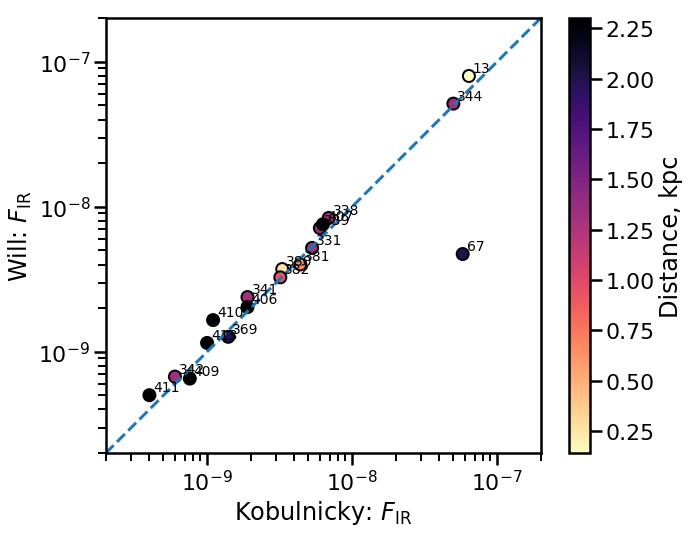

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.scatter(t['FIR'], t['FIR_will'], 
               c=t['Dist'], cmap='magma_r', 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label('Distance, kpc')
for id_, x, y in zip(t['ID'], t['FIR'], t['FIR_will']):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 2e-10, 2e-7
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky: $F_\mathrm{IR}$',
    ylabel=r'Will: $F_\mathrm{IR}$',
)
ax.set_aspect('equal')
None

So everything looks OK, except:

* Source 67 is over 10 times too bright in the Kobulnicky table

So, I will use my fluxes instead.  

Now add in the table that I transcribed from the 2018 paper:

In [25]:
tab18 = Table.read('kob18.fits')

In [26]:
tt = join(t, tab18, keys='ID')
tt['LIR_will'] = tt['FIR_will']*(u.erg/u.cm**2/u.s)*4*np.pi*(tt['Dist']*1e3*u.parsec).to(u.cm)**2 / const.L_sun.to(u.erg/u.s)
tt['LIR/L* will'] = tt['LIR_will']/(1e4*tt['L4'])
tt

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR_1,LIR,Rad,Height,F8 or 12,F24 or 22,F70,F160,I70,T2x/70,Observatory,FIR_will,L4,V3,R0,S7,R0_as,l_as,l/R0,j_-12,D_kpc,FIR_-9,L*/LIR_2,LIR_will,LIR/L* will
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,,,,,,,,,,,,,,,,,,,,,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,173.0,404.0,51.32,343.77,246.7,61.55,9.8,158.0,WISE,7.99017e-08,8.1,1.3,0.175,12.3,299.0,277,0.93,8.7,0.11,64.0,3339.43,48.9498219269,0.000604318789221
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9.0,9.0,0.31,27.659,4.41,-5.4,38.7,708.0,SST,4.72475e-09,5.1,1.3,0.08,64.0,7.5,15,2.0,11.0,1.99,58.0,7.09,584.822417713,0.0114671062297
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33.0,30.0,-0.017,28.45,12.72,-4.8,17.6,195.0,SST,5.2048e-09,12.0,2.5,0.296,12.0,42.0,55,1.31,8.3,1.32,5.3,414.87,283.459445811,0.00236216204843
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24.0,16.0,1.179,32.85,55.63,-18.07,98.4,110.0,SST,8.37609e-09,7.9,1.2,0.162,79.8,23.0,29,1.26,8.9,1.32,6.9,209.79,456.171578056,0.00577432377286
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108.0,66.0,-0.34,31.116,40.7,-5.5,31.6,120.0,SST,7.13586e-09,32.0,2.9,0.493,29.9,70.0,47,0.67,8.3,1.32,6.0,977.24,388.627213531,0.00121446004228
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30.0,25.0,-0.278,10.669,11.98,-5.91,-99.9,126.0,SST,2.38474e-09,5.1,1.3,0.141,5.0,20.0,31,1.55,8.7,1.32,1.9,491.84,129.87570681,0.00254658248647
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18.0,10.0,0.383,0.773,8.99,5.25,49.2,70.0,SST,6.7409e-10,1.4,0.8,0.07,57.8,10.0,14,1.4,8.9,1.32,0.6,427.54,36.7117233759,0.00262226595542
344,BD+43 3654,G082.4100+02.3254,O4If,40700,19.0,1.32,193.0,1.24,910.0,5e-08,350.0,2723.05800234,171.0,108.0,18.036,141.124,482.2,134.8,52.7,98.0,WISE,5.150068e-08,87.0,3.0,1.359,58.6,193.0,170,0.88,8.0,1.32,50.0,318.83,2804.786776,0.00322389284597


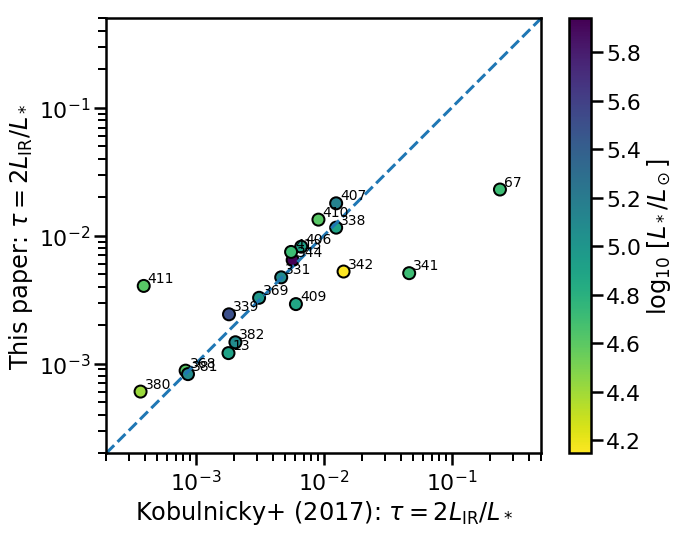

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = 2.0/tt['L*/LIR_1'], 2*tt['LIR/L* will']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']), cmap='viridis_r', 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 2e-4, 5e-1
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky+ (2017): $\tau = 2 L_\mathrm{IR}/L_*$',
    ylabel=r'This paper: $\tau = 2 L_\mathrm{IR}/L_*$',
)
ax.set_aspect('equal')
None

In this graph we compare the original luminosity ratio taken directly from the Kobulnicky (2017) table (x axis) with the ratio calculated using my new total IR fluxes, combined with the new luminosities in the Kobulnicky (2018) table (y axis).   Most of the points show reasonable agreement between the two methods, with a few exceptions:

* 67: this had the $F_\text{IR}$ overestimated in K17.  Using a more reasonable value gives a lower $\tau$
* 341: The spectral class has changed from B2 (K17) to O9 (K18), increasing the assumed $L_*$, which lowers $\tau$
* 411: The luminosity class has changed from Ib (K17) to V (K18), so $L_*$ has been greatly reduced, which increases the estimated $\tau$

And there doesn't seem to be any significant correlation with stellar luminosity.

Next job is to estimate the shell pressure from the $\tau$:

1. Assume UV dust opacity per gas mass gives column density: $\Sigma = \tau/\kappa$.
2. Using measured thickness, find $\rho = \Sigma / H$
3. Assume sound speed, so $P_\mathrm{shell} = \rho a^2$

Putting it all together gives $P_\mathrm{shell} = \tau a^2 / \kappa H$.

Then we can compare that with the radiation pressure at the shell:
$$
P_\mathrm{rad} = \frac{L_*}{4\pi R^2 c}
$$
and define an observational momentum trapping efficiency: $\eta_\mathrm{obs} = P_\mathrm{shell} / P_\mathrm{rad}$, so that:
$$
\eta_\mathrm{obs} = \frac{\tau a^2}{\kappa H} \frac{4\pi R^2 c}{L_*}
$$
If we expand out the $\tau$, we se that $\eta_\mathrm{obs} \propto L_*^{-2}$, which is quite a steep sensitivity (especially since $L_*$ may be just a guess). 

Make a new table that just has the columns that we want.  We take the $R_0$ from K18 Table 1.  The thickness $H$ could be taken from K17: "Height" in Tables 1 and 2. *But* I don't trust those values.  For instance, zeta Oph clearly has $H < 60''$ from its image, but the table gives $404''$, which is ridiculous given that $R_0 = 299''$. In fact, when I use these columns and calculate $H/R$, then I get a range from 0.5 to 3, which does not make any sense.

It would be better to simply assume $H/R = 3 / (4 M^2)$, which is $\approx 0.1$ if $V = 30$ km/s, but more likely the velocities are lower.  Let's assume 0.25 for now.  Assume $\kappa = 600$ and $a = 11.4$ km/s

In [200]:
colnames = tt.colnames[0:5] + ['L4', 'LIR_will', 'R0', 'D_kpc', 'U']
ttt = tt[colnames]
ttt['tau'] = np.round(2*tt['LIR/L* will'], decimals=5)
ttt['H/R'] =np.round(tt['Height'] / tt['R0_as'], decimals=2)

cs = (11.4*u.km/u.s).cgs
kappa = 600.0*u.cm**2/u.g
H_R = 0.25

ttt['P_k_shell'] = np.array(ttt['tau'])*(cs**2 / (const.k_B*kappa * H_R * ttt['R0']*u.parsec)).cgs
ttt['n_shell'] = np.round(ttt['P_k_shell']/u.Kelvin/(2 * 1.0e4), decimals=1)
ttt['P_k_rad'] = (1e4*const.L_sun*ttt['L4'] / (4*np.pi * (ttt['R0']*u.pc)**2 * const.c * const.k_B)).cgs
ttt['eta_obs'] = np.round(ttt['P_k_shell'].data/ttt['P_k_rad'].data, decimals=5)
ttt

ID,Name1,Name,SpType,Teff,L4,LIR_will,R0,D_kpc,U,tau,H/R,P_k_shell,n_shell,P_k_rad,eta_obs
,,,,K,,,,,,,,K / cm3,1 / cm3,K / cm3,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,8.1,48.9498219269,0.175,0.11,170000.0,0.00121,1.35,140615.141538,7.0,20444008.9088,0.00688
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,5.1,584.822417713,0.08,1.99,16000.0,0.02293,1.2,5829064.14469,291.5,61595267.003,0.09463
331,LS II+39 53,G078.2869+00.7780,O7V,35500,12.0,283.459445811,0.296,1.32,7300.0,0.00472,0.71,324291.118244,16.2,10586562.4549,0.03063
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.9,456.171578056,0.162,1.32,3800.0,0.01155,0.7,1449945.69347,72.5,23267740.0001,0.06232
339,CPR2002A37,G080.2400+00.1354,O5V,41500,32.0,388.627213531,0.493,1.32,2600.0,0.00243,0.94,100240.706987,5.0,10176847.8076,0.00985
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.1,129.87570681,0.141,1.32,470.0,0.00509,1.25,734147.689612,36.7,19828464.8066,0.03702
342,KGK2010 2,G080.9020+00.9828,B2V,20900,1.4,36.7117233759,0.07,1.32,1900.0,0.00524,1.0,1522362.27615,76.1,22084577.5249,0.06893
344,BD+43 3654,G082.4100+02.3254,O4If,40700,87.0,2804.786776,1.359,1.32,910.0,0.00645,0.56,96521.7138336,4.8,3641140.85116,0.02651


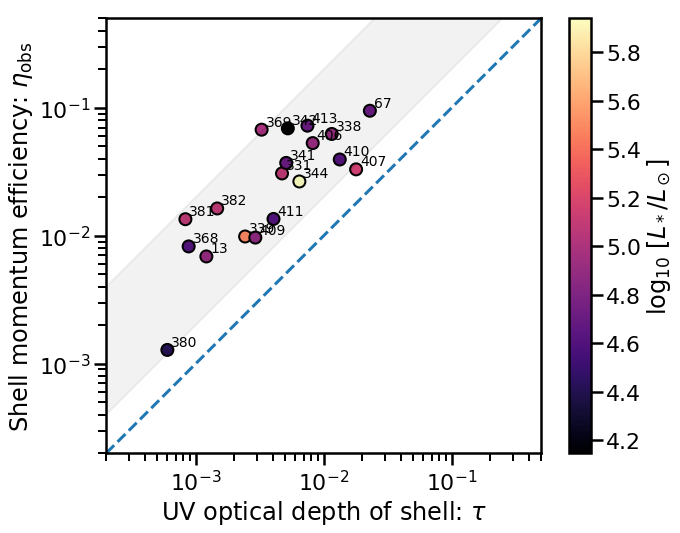

In [116]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = ttt['tau'], ttt['eta_obs']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']),
#               c=np.log10(tt['Teff']), 
               cmap='magma', 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(
    r'$\log_{10}\ \left[L_* / L_\odot \right]$'
#    r'$\log_{10}\ \left[T_\mathrm{eff} \right]$'
)
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 2e-4, 5e-1
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.fill_between([fmin, fmax], [20*fmin, 20*fmax], [2*fmin, 2*fmax], color='k', alpha=0.05)
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'UV optical depth of shell: $\tau$',
    ylabel=r'Shell momentum efficiency: $\eta_\mathrm{obs}$',
)
ax.set_aspect('equal')
None

Now, before proceeding to the mass loss rates, let's do a factor plot of some selected parameters:

In [161]:
from scipy import stats

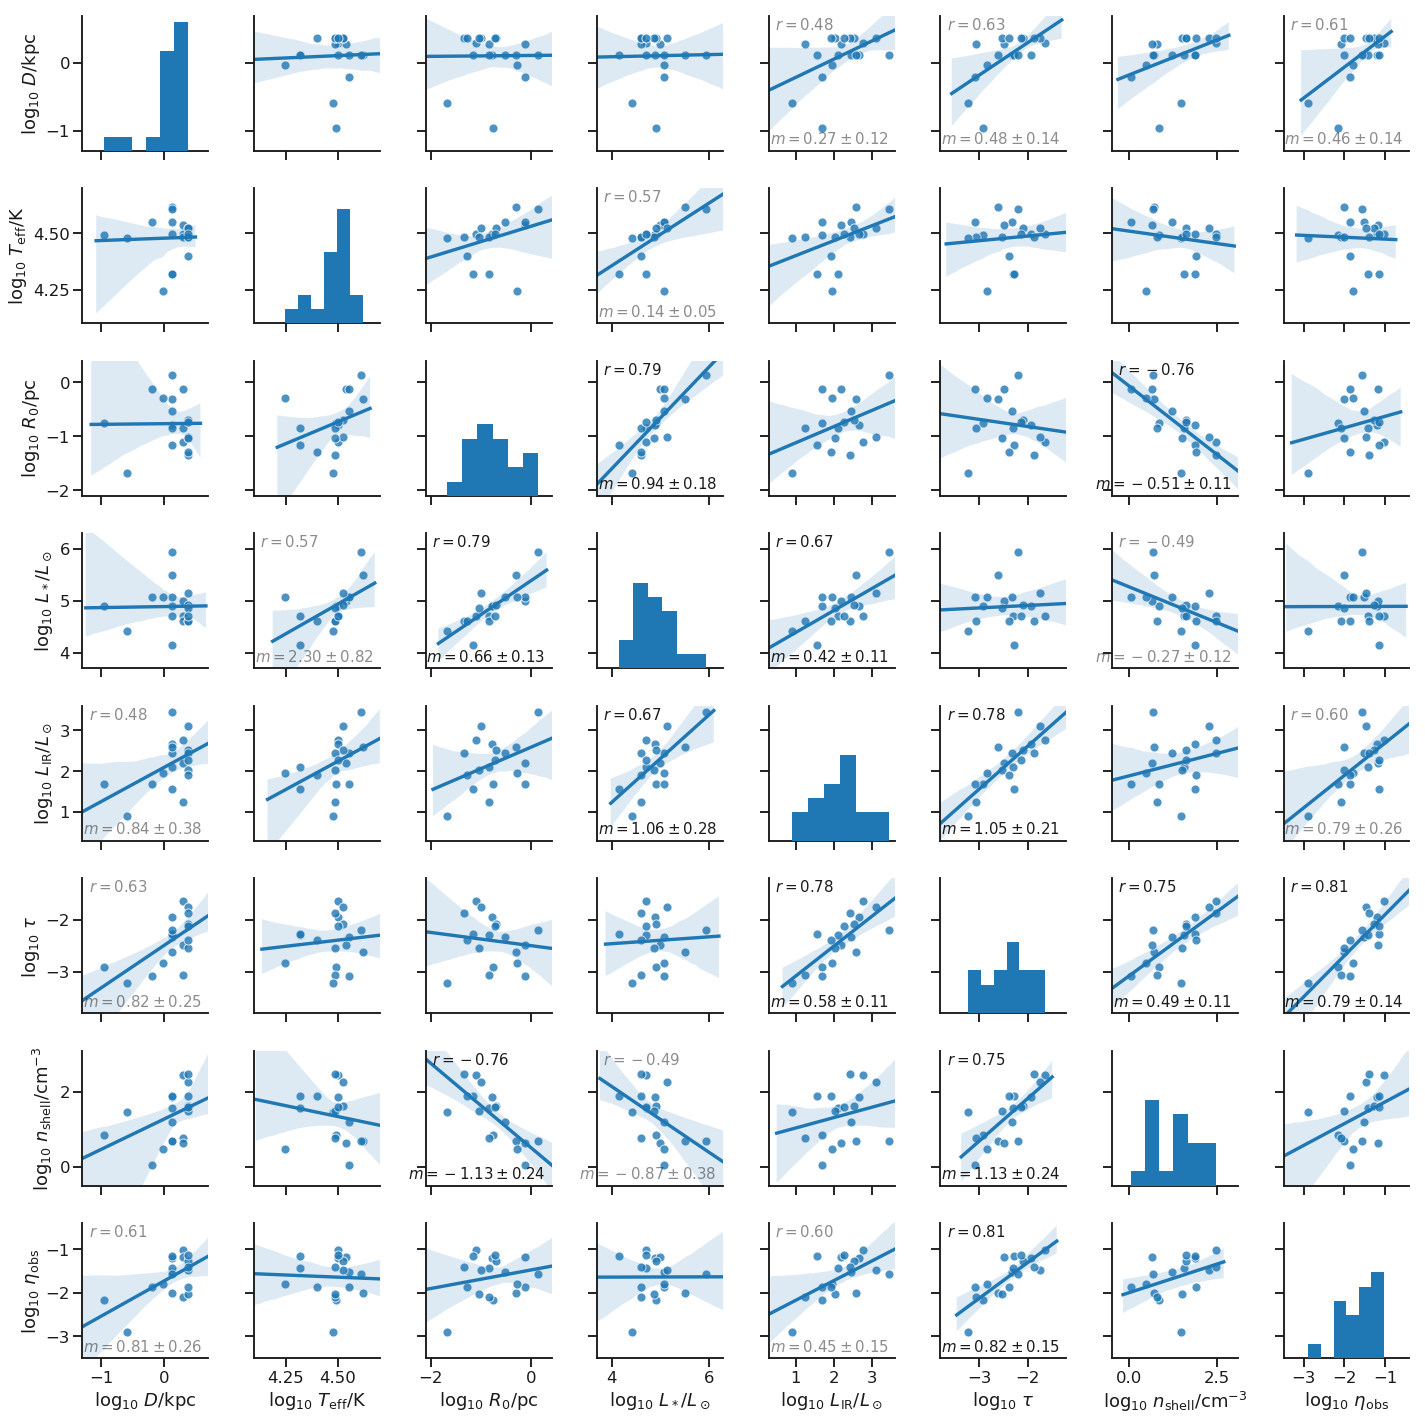

In [202]:
df = ttt.to_pandas()
df.set_index(keys='ID', inplace=True)
columns = ['D_kpc', 'Teff', 'R0', 'L4', 'LIR_will', 'tau', 'n_shell', 'eta_obs']
pretty = [
    r'$\log_{10}\ D / \mathrm{kpc}$', 
    r'$\log_{10}\ T_\mathrm{eff} / \mathrm{K}$', 
    r'$\log_{10}\ R_0 / \mathrm{pc}$', 
    r'$\log_{10}\ L_* / L_\odot$', 
    r'$\log_{10}\ L_\mathrm{IR} / L_\odot$', 
#    r'$\log_{10}\ F_\mathrm{IR} / \mathrm{erg\ s^{-1}\ cm^{-2}}$', 
    r'$\log_{10}\ \tau$', 
    r'$\log_{10}\ n_\mathrm{shell} / \mathrm{cm^{-3}}$', 
    r'$\log_{10}\ \eta_\mathrm{obs}$',     
]
minmax = [ 
    [-1.3, 0.7], # D
    [4.1, 4.7], # Teff
    [-2.1, 0.4], # R0
    [3.7, 6.3], # was L4 (but now just L/Lsun)
    [0.3, 3.6], # LIR
#    [-10.3, -6.7], # FIR
    [-3.8, -1.2], # tau
    [-0.5, 3.1], # n_shell
    [-3.5, -0.4], # eta_obs
]
df = df.assign(**{col: np.log10(df[col]) for col in columns})
df = df.assign(
    L4=4.0 + df.L4,
    close=pd.Categorical((df['D_kpc'] < 1.5).astype('S5')),
)

def corrfunc(x, y, **kws):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
#    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    if pvalue < 0.05:
        fontcolor = 'k' if pvalue < 0.003 else 'k'
        fontalpha = 1.0 if pvalue < 0.003 else 0.5
        ax.annotate(f"$r = {rvalue:.2f}$",
                    xy=(.05, .9), xycoords=ax.transAxes, 
                    fontsize='small', color=fontcolor, alpha=fontalpha)
        ax.annotate(rf"$m = {slope:.2f} \pm {stderr:.2f}$",
                    xy=(.95, .05), ha='right', xycoords=ax.transAxes, 
                    fontsize='small', color=fontcolor, alpha=fontalpha)

    
with sns.plotting_context('talk', font_scale=1.0):
    g = sns.pairplot(df, vars=columns, 
                     diag_kind='hist', 
#             diag_kind='kde',
#             hue='close', 
                     kind='reg',
                     plot_kws=dict(scatter_kws=dict(edgecolor='w')),
                     diag_kws=dict(bins=6),
                    )
    g.map_offdiag(corrfunc)
    for j, [[v1, v2], label] in enumerate(zip(minmax, pretty)):
        g.axes[j, j].set(xlim=[v1, v2], ylim=[v1, v2])
        g.axes[-1, j].set(xlabel=label)
        g.axes[j, 0].set(ylabel=label)
    plt.gcf().savefig('K18-pairplot.pdf')
    
#df

Some observations about these correlations:

1. The basic observational parameters are $D$, $T_\mathrm{eff}$, $R_0$, $L_*$, $L_\mathrm{IR}$.  In principle, observational errors in these should all be independent, so any correlations between them are real. 
    1. The first three are the best determined, and there are no significant corrlations between them.
    2. The luminosities might potentially suffer from Malmquist bias, but there is no evidence for this in the case of $L_*$ since low luminosities are seen at the largest distance.  In the case of $L_\mathrm{IR}$, there is a slight increasing trend with distance, which might indicate bias, but it is only marginally significant.
    3. $R_0$ could also be Malmquist biased due to angular resolution, but there is no trend in $R_0$–$D$, so it seems not.  This is probably because the smallest bows in this subsample have angular sizes $> 4''$ and are still just resolved at Carina at 8 micron (Spitzer has $2''$ resolution at 8 micron).

2. $\tau$ is found from $L_\mathrm{IR}/L_*$, meaning that errors in $L_*$ would give negative $\tau$–$L_*$ correlation, but they seem to be uncorrelated so we are probably OK.  

3. If $L_*$ were determined from photometry, then any distance errors would give a spurious $R_0 \propto L_*^{1/2}$ correlation.  **So it is a good job that it is found from spectral classification instead**.  Also, the distances should be reliable.

4. What we actually see is a linear $R_0 \propto L_*$ correlation.  This is the most significant correlation of all ($r = 0.79$), implying that >60% of the variation in $R_0$ is driven by the stellar luminosity, leaving only 40% left for the environment (and other stellar properties). 

5. We also have a moderate correlation between $L_*$ and $T_\mathrm{eff}$, which is clearly because half the stars are MS, with a tight correlation, and the other half are evolved

6. Other strong correlations:
    1. $L_\mathrm{IR}$–$L_*$: approximately linear, explaining 45% in variance of $L_\mathrm{IR}$.  This means that there is no trend in $\tau$ with $L_*$
    2. $\tau$–$L_\mathrm{IR}$ is very well correlated with $m \approx -1$.  **However**, this is exactly what you would get if the dispersion about the linear $L_\mathrm{IR}$–$L_*$ trend were entirely due to measurement errors in $L_\mathrm{IR}$.  Hopefully, that is not the case, but it needs checking.  The std dev of log $\tau$ is about 0.5 dex (the same is true of nearly all the parameters, except for $T_\mathrm{eff}$).


In [203]:
df.describe()

,Teff,L4,LIR_will,R0,D_kpc,U,tau,H/R,P_k_shell,n_shell,P_k_rad,eta_obs
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000,1.900000e+01,19.000000
mean,4.479590,4.890865,2.187999,-0.763013,0.108295,37298.947368,-2.402005,1.294737,1.291672e+06,1.367442,5.902380e+07,-1.635669
std,0.096253,0.392499,0.622041,0.468568,0.353575,71000.442009,0.461698,0.699288,1.834588e+06,0.700648,1.057229e+08,0.470443
min,4.245513,4.146128,0.895608,-1.677781,-0.958607,320.000000,-3.221849,0.440000,2.284117e+04,0.041393,1.301503e+06,-2.892790
25%,4.480711,4.660177,1.807644,-1.064214,0.120574,2250.000000,-2.723538,0.825000,1.114096e+05,0.742150,1.038171e+07,-1.938921
50%,4.498311,4.897627,2.200248,-0.790485,0.120574,4100.000000,-2.326058,1.140000,6.385349e+05,1.503791,1.982846e+07,-1.513853
75%,4.530152,5.079181,2.558074,-0.417931,0.371068,23500.000000,-2.106724,1.610000,1.486154e+06,1.870861,6.386449e+07,-1.241041
max,4.618048,5.939519,3.447900,0.133219,0.371068,230000.000000,-1.639596,2.950000,5.897701e+06,2.469675,4.557135e+08,-1.023971


As an aside, we will compare my $G$ with their $U$

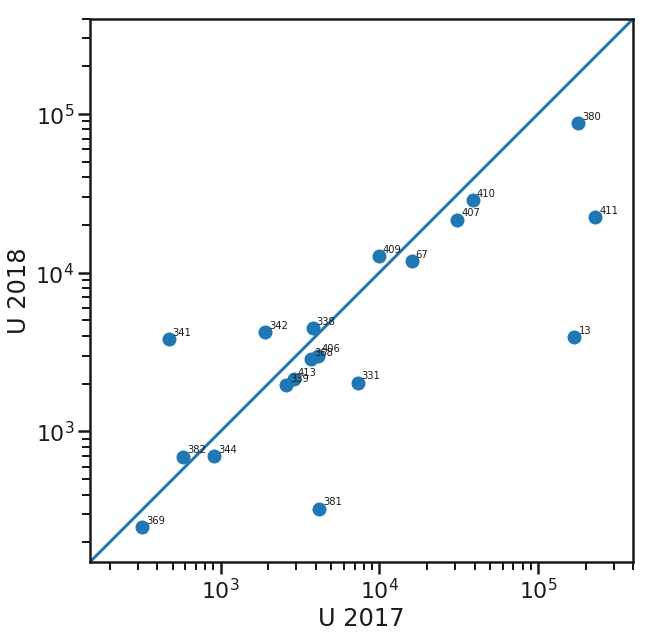

In [267]:
ttt['G'] = 0.074*200*ttt['L4']/ttt['R0']**2
ddf = ttt['ID', 'U', 'G'].to_pandas()
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = 150, 4e5
ax.scatter(x='U', y='G', data=ddf)
ax.plot([vmin, vmax], [vmin, vmax])
for id_, x, y in zip(ttt['ID'], ttt['U'], ttt['G']):
    ax.annotate(
        str(id_), (x, y),
        xytext=(4,4), textcoords='offset points',
               )
ax.set(xscale='log', yscale='log', 
       xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='U 2017', ylabel='U 2018',
      )
ax.set_aspect('equal')

In [277]:
ddf['log U/U'] = np.log10(ddf.U/ddf.G)
ddf.describe()

,ID,U,G,log U/U
count,19.000000,19.000000,19.000000,19.000000
mean,339.526316,37298.947368,11301.387297,0.225101
std,109.824794,71000.442009,20242.935338,0.552781
min,13.000000,320.000000,249.201067,-0.907296
25%,340.000000,2250.000000,1987.802649,0.019762
50%,369.000000,4100.000000,3796.589709,0.132468
75%,406.500000,23500.000000,12228.242788,0.235950
max,413.000000,230000.000000,87256.235828,1.637778


So this seems to be a discrepancy between their U column and their new luminosities. So maybe I shouldn't worry about it.

In [256]:
from astropy.table import QTable
ltab = QTable(tt['ID', 'Teff', 'R*', 'L4'], masked=False)
ltab['L2017'] = (4*np.pi*ltab['R*']**2 * const.sigma_sb*ltab['Teff']**4).to(u.Lsun)
ltab['L4'] = ltab['L4']*1e4*u.Lsun
ltab

ID,Teff,R*,L4,L2017
,K,solRad,solLum,solLum
int64,float64,float64,float64,float64
13,31000.0,7.2,81000.0,43132.52455543753
67,31500.0,7.7,51000.0,52591.64746203363
331,35500.0,9.3,120000.0,123757.75409452198
338,31500.0,7.7,79000.0,52591.64746203363
339,41500.0,11.1,320000.0,329254.2992268516
341,20900.0,5.4,51000.0,5012.631444422643
342,20900.0,5.4,14000.0,5012.631444422643
344,40700.0,19.0,870000.0,892437.7833740469


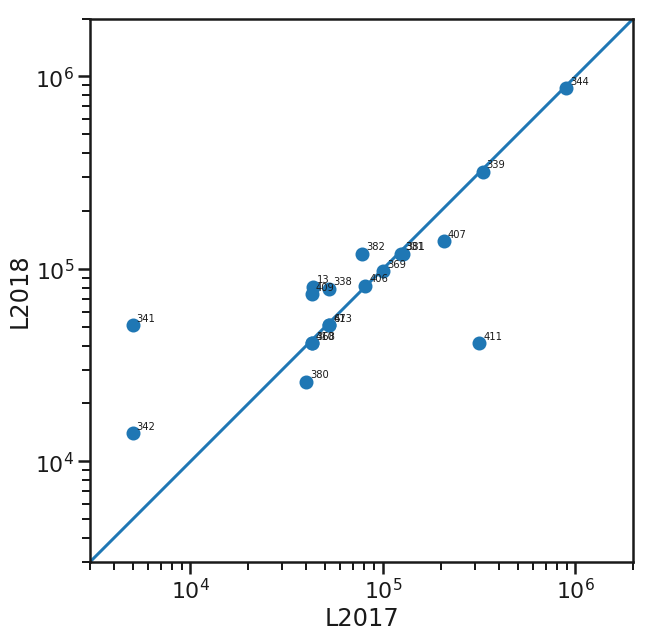

In [266]:
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = 3e3, 2e6
ax.scatter(ltab['L2017'], ltab['L4'])
for id_, x, y in zip(ltab['ID'], ltab['L2017'].data, ltab['L4'].data):
    ax.annotate(
        str(id_), (x, y),
        xytext=(4,4), textcoords='offset points',
               )
ax.plot([vmin, vmax], [vmin, vmax])
ax.set(xscale='log', yscale='log', 
       xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='L2017', ylabel='L2018',
      )
ax.set_aspect('equal')

Not the same!  But doesn't fully explain the $U$ scatter.  Must be different radii too